## Supervised Learning
Supervised learning is a class of machine learning algorithm that takes in a series of vectors
and their corresponding output (a continuous value or a class) as input, and produces an
inferred function that can be used to map new examples.

An important precondition for using supervised learning is the availability of labeled data.
In other words, it is necessary that we have access to input for which we already know the
correct output.

Supervised learning can be classified into two types: classification and regression. A
classification problem has a discrete set of values as the target variable (for instance,
a like and a dislike), whereas a regression problem has a continuous value as its target (for
instance, an average rating between one and five).

### K-nearest neigbors
k-nearest neighbors (k-NN) is perhaps the simplest machine learning algorithm. In the
case of classification, it assigns a class to a particular data point by a majority vote of its k
nearest neighbors. In other words, the data point is assigned the class that is the most
common among its k-nearest neighbors. In the case of regression, it computes the average
value for the target variable based on its k-nearest neighbors.

### Support Vector Machines

The support vector machine is one of the most popular classification algorithms used in the
industry. It takes in an n-dimensional dataset as input and constructs an (n-1) dimensional
hyperplane in such a way that there is maximum separation of classes.

### Decision Trees
Decision trees are extremely fast and simple tree-based algorithms that branch out on
features that result in the largest information gain. Decision trees, although not very
accurate, are extremely interpretable.

### Ensembling
The main idea behind ensembling is that the predictive power of multiple algorithms is
much greater than a single algorithm. Decision trees are the most common base algorithm
used when building ensembling models.

#### Bagging
Bagging is short for bootstrap aggregating. Like most other ensemble methods, it averages
over a large number of base classification models and averages their results to deliver its
final prediction.
These are the steps involved in building a bagging model:
1. A certain percentage of the data points are sampled (say 10%). The Sampling is
done with replacement. In other words, a particular data point can appear in
multiple iterations.
2. A baseline classification model (typically a decision tree) is trained on this
sampled data.
3. This process is repeated until n number of models are trained. The final
prediction delivered by the bagging model is the average of all the predictions of
all the base models.

An improvement on the bagging model is the random forest model. In addition to
sampling data points, the random forest ensemble method also forces each baseline model
to randomly select a subset of the features (usually a number equal to the square root of the
total number of features):


#### Boosting

The bagging and the random forest models train baseline models that are completely
independent of each other. Therefore, they do not learn from the mistakes that each learner
has made. This is where boosting comes into play.

Like random forests, boosting models build a baseline model using a subset of samples and
features. However, while building the next learners, the boosting model tries to rectify the
mistakes that the previous learners made. Different boosting algorithms do this in different
ways.



In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/home/nirajan/miniconda3/envs/trainee/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
display(iris.head())

X = iris.drop('class', axis=1)
y = iris['class']

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
X.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.9736842105263158

<Axes: >

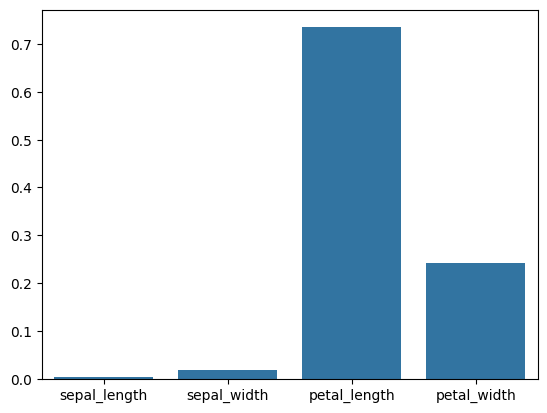

In [5]:
sns.barplot(x = ["sepal_length", "sepal_width", "petal_length", "petal_width"], y = gbc.feature_importances_)